## CRE Data Through the Ages
### Professor Timothy H. Savage, Ph.D. CRE
#### NYU Schack Institute of Real Estate
#### Faculty Director | CREFC Center for Real Estate Finance at NYU Schack
#### Former Senior Managing Economist and Principal Data Scientist | CBRE

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import fix_yahoo_finance
import yfinance as yf
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from tabulate import tabulate
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
from IPython.display import Image
import urllib.request as url
import io
import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

Populating the interactive namespace from numpy and matplotlib


## In CRE, What Are the Important Features to Measure?

* Rent
* Vacancy
* Cap rates $\approx$ value

In [2]:
cap_rates = pd.read_csv('nyc.csv', index_col='Time')

Text(0, 0.5, '2009 $/sf')

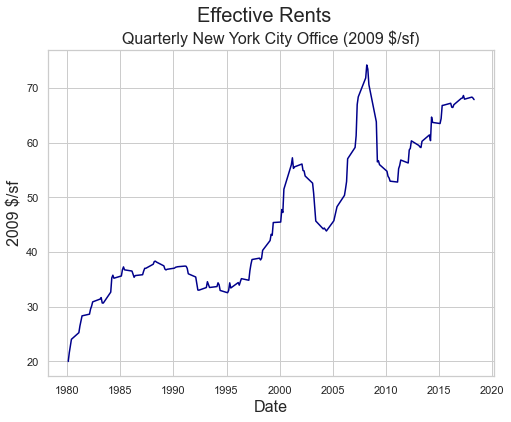

In [3]:
plt.figure(figsize = (8, 6))
plt.suptitle("Effective Rents", fontsize=20)
plt.title("Quarterly New York City Office (2009 $/sf)", fontsize=16)
plt.plot(cap_rates['TW Rent Index ($/sf)'], color='darkblue')
plt.xlabel('Date', fontsize=16)
plt.ylabel('2009 $/sf', fontsize=16)



Text(0, 0.5, '%')

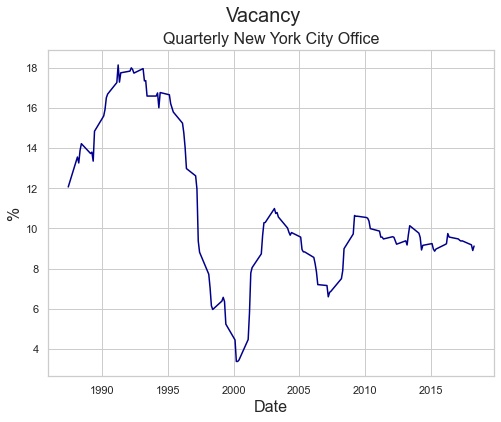

In [4]:
plt.figure(figsize = (8, 6))
plt.suptitle("Vacancy", fontsize=20)
plt.title("Quarterly New York City Office", fontsize=16)
plt.plot(cap_rates['Vacancy Rate (%)'], color='darkblue')
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)



In [5]:
cap_rates = pd.read_excel("cap rates.xls", index_col='Date')
cap_rates = cap_rates.drop(['GT10'], axis=1)
cap_rates = cap_rates.rename(columns={"Retail":"R", "Multifam":"M", "Indust":"I", "Office":"O"})

Text(0, 0.5, '%')

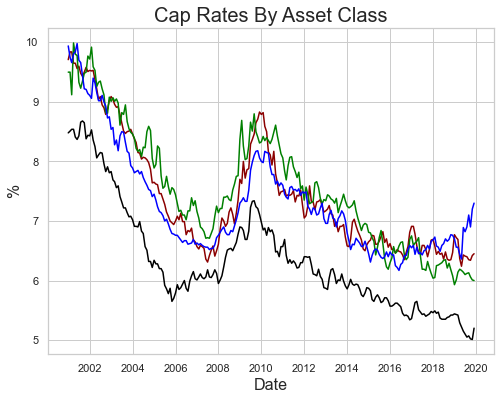

In [6]:
plt.figure(figsize = (8, 6))
plt.title("Cap Rates By Asset Class", fontsize=20)
plt.plot(cap_rates['O'], label='Office', c='darkred')
plt.plot(cap_rates['I'], label='Industrial', c='green')
plt.plot(cap_rates['R'], label='Retail', c='blue')
plt.plot(cap_rates['M'], label='MF', c='black')
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

## PropTech Has Been Around for a Long Time

## Old (in Alpha)
* CBRE Econometric Advisors (EA)
* CoStar
* National Council of Real Estate Investment Fiduciaries (NCREIF)
* Real Capital Analytics (RCA)

## New (in Alpha)
* Cherie
* Moody's
* Reonomy
* Revere
* VTS
* Zillow

## What Is Driving the Explosion of PropTech?

* Liquidity and the reach for yield.
* The need for accuracy, granularity and timeliness of data.
* The failure of old platforms to stay current.
* COVID.

## Now Consider the Time Dimension

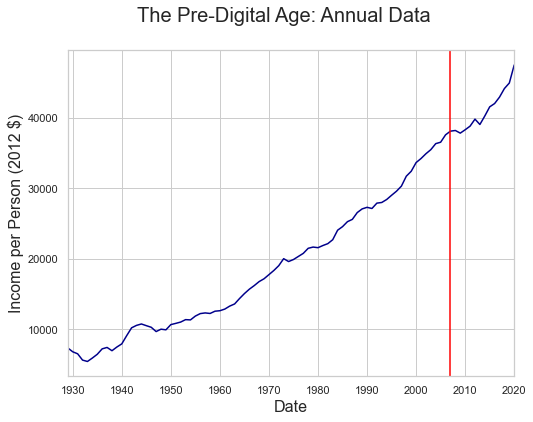

In [7]:
gdp_pc = fred.get_series("A229RX0A048NBEA")
gdp_pc.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('The Pre-Digital Age: Annual Data', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Income per Person (2012 $)', fontsize=16)
plt.axvline(dt.datetime(2007, 6, 29), color="red")


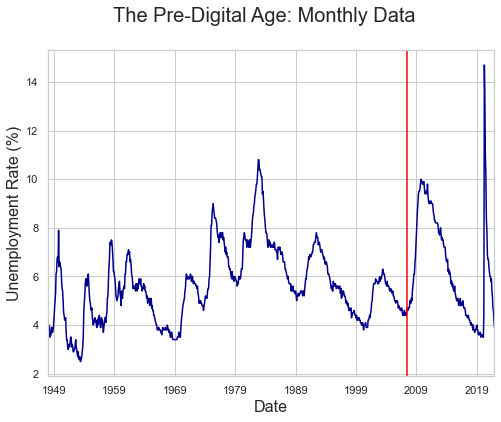

In [8]:
unrate = fred.get_series("UNRATE")
unrate.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('The Pre-Digital Age: Monthly Data', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Unemployment Rate (%)', fontsize=16)
plt.axvline(dt.datetime(2007, 6, 29), color="red")


In [9]:
aapl_all = yf.download('aapl')
aapl = aapl_all['Adj Close']
aapl_returns = (np.log(aapl / aapl.shift(1))).dropna()

[*********************100%***********************]  1 of 1 completed


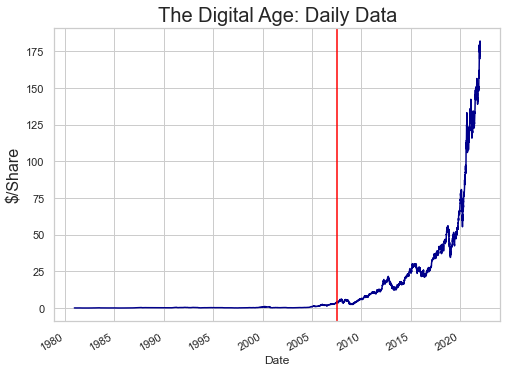

In [10]:
plt.figure(figsize=(8, 6))
aapl.plot(color='darkblue')
plt.title('The Digital Age: Daily Data', fontsize=20)
plt.ylabel('$/Share', fontsize=16)
plt.axvline(dt.datetime(2007, 6, 29), color="red")



## Why Does This Matter for CRE?
* Algorithms will be deployed to allocate capital.  **Why?**
* No algorithm can correct for mismeasured data: adverse impact on both bias and variance.  
    * Better to observe 30% of the universe accurately than 100% of the universe inaccurately.
* **Inaccuracy in CRE data abounds**.
* I have 160 observations to help you allocate billions.  
> Savage (2016)

## A Specific Example: Cap Rates
* What exit cap rate do you use in a DCF model, given you are forecasting 10 years into the future?
* Extant **CBRE cap rate forecasts** showed a **negative correlation** between cap rates and 10-year U.S. Treasury, which is non-sensical.
    * MSFE was over 200 basis points (bps).
    * **Imagine the impact of using a 7-handle rather than a 5-handle on the PV of a DCF.**
    * **Large investors** relied on these forecasts in decision making.

### Apply Economics and Analytics
* A colleague and I reduced both **bias and variance**. 
* 100 bps change in Treasurys yields 45 bps change in cap rates: **positive correlation with a plausible impact**.
* MSFE was 32 bps.

### Thank You
#### Q&A



[Slides](https://github.com/thsavage/Public-Presentations)
